<a href="https://colab.research.google.com/github/DMXMax/covid19/blob/gc_20200315/coviddata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests,json
import datetime


In [0]:
covidtrackingurl = "https://covidtracking.com/api/v1/states/daily.json"
response = requests.get(covidtrackingurl)
dfCovidtracking = pd.DataFrame(response.json())
dfCovidtracking.fillna(0, inplace=True)
dfCovidtracking.negative = dfCovidtracking.negative.astype('int64')
dfCovidtracking.positive = dfCovidtracking.positive.astype('int64')
dfCovidtracking.pending = dfCovidtracking.pending.astype('int64')
dfCovidtracking.total = dfCovidtracking.total.astype('int64')
dfCovidtracking.death = dfCovidtracking.death.astype('int64')

dfCovidtracking.date = dfCovidtracking.date.transform(lambda x: pd.to_datetime(datetime.date(x//10000, x%10000//100, x%100
                                          )))


In [0]:
dfWHO = pd.read_csv("https://raw.githubusercontent.com/DMXMax/covid19/master/who/who_data.tsv",
                     sep='\t', index_col='Date')

In [0]:
jhurl = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"+\
"csse_covid_19_data/csse_covid_19_daily_reports/05-16-2020.csv"


dfJHUData = pd.read_csv(jhurl, header=0,
                        names=['FIPS', 'city','state', 'country', 'last_update',
                               'lat', 'lon','confirmed', 'dead', 'recovered','active', 'key'])

In [0]:
dfWHO = dfWHO.rename(columns={"Confirmed": "confirmed", "Deaths": "who_deaths"})
dfWHO.index.names=['date']


In [6]:
dfCovidtracking[dfCovidtracking.state=='CA'].head(10)

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
5,2020-05-17,CA,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,efe3d2e04569547fc50e7c3d8084f6f4ea4d4cc7,2020-05-17T20:00:00Z,3261,0.0,1235243,1235243,1235243,06,57.0,0.0,54071.0,2046.0,56117.0
61,2020-05-16,CA,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,B,5/16/2020 00:00,e335473bcecc2092fc63063fe12ed043c5f73751,2020-05-16T20:00:00Z,3204,0.0,1179126,1179126,1179126,06,96.0,0.0,43363.0,1857.0,45220.0
117,2020-05-15,CA,74936,1058970,0,4519.0,0.0,1324.0,0.0,0.0,0.0,0.0,B,5/14/2020 00:00,dd4a56509207e53adc6f228223657494252d0d39,2020-05-15T20:00:00Z,3108,0.0,1133906,1133906,1133906,06,76.0,0.0,27483.0,1772.0,29255.0
173,2020-05-14,CA,73164,1031487,0,4655.0,0.0,1324.0,0.0,0.0,0.0,0.0,B,5/14/2020 00:00,ab1526dbbdbe36c6e661db2aa371d77dd19df51d,2020-05-14T20:00:00Z,3032,0.0,1104651,1104651,1104651,06,98.0,0.0,37036.0,2023.0,39059.0
229,2020-05-13,CA,71141,994451,0,4545.0,0.0,1314.0,0.0,0.0,0.0,0.0,B,5/13/2020 00:00,8a5867cd4322367e6ab3f8a0fb2b92285aa60b64,2020-05-13T20:00:00Z,2934,0.0,1065592,1065592,1065592,06,87.0,0.0,30463.0,1759.0,32222.0
285,2020-05-12,CA,69382,963988,0,4544.0,0.0,1349.0,0.0,0.0,0.0,0.0,B,5/12/2020 00:00,1c3c812803c41f5b0c75e07b15a8a4428e7d662f,2020-05-12T20:00:00Z,2847,0.0,1033370,1033370,1033370,06,77.0,0.0,40030.0,1443.0,41473.0
341,2020-05-11,CA,67939,923958,0,4549.0,0.0,1329.0,0.0,0.0,0.0,0.0,B,5/11/2020 00:00,53613cacac307d4a734c079025735a0eec798c35,2020-05-11T20:00:00Z,2770,0.0,991897,991897,991897,06,25.0,0.0,34974.0,1259.0,36233.0
397,2020-05-10,CA,66680,888984,0,4555.0,0.0,1328.0,0.0,0.0,0.0,0.0,B,5/10/2020 00:00,b618e4b193ed0312e703672e19ebad8c2eb045b9,2020-05-10T20:00:00Z,2745,0.0,955664,955664,955664,06,67.0,0.0,40975.0,2119.0,43094.0
453,2020-05-09,CA,64561,848009,0,4538.0,0.0,1349.0,0.0,0.0,0.0,0.0,B,5/9/2020 14:00,47564b4be2325468b20b81c3212689a291e88901,2020-05-09T20:00:00Z,2678,0.0,912570,912570,912570,06,93.0,0.0,35249.0,2049.0,37298.0
509,2020-05-08,CA,62512,812760,0,4514.0,0.0,1342.0,0.0,0.0,0.0,0.0,B,5/8/2020 14:00,d5ef05ed6769ba774cc29375bd1e4f0a66958120,2020-05-08T20:00:00Z,2585,0.0,875272,875272,875272,06,81.0,0.0,30500.0,1898.0,32398.0


In [7]:
dfctd_state_curr = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()] \
  .rename(columns={'positive':'total_positive'}) \
  .set_index('state') 

print(f"Total positive cases = {dfctd_state_curr.total_positive.sum()}")
print(f"Total deaths = {dfctd_state_curr.death.sum()}")
  
dfctd_state_curr.sort_values(by='total_positive', ascending=False).head(5)

Total positive cases = 1479856
Total deaths = 83854


,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
NY,2020-05-17,350121,1063275,0,5897.0,75525.0,1981.0,0.0,1601.0,0.0,61381.0,A,5/17/2020 00:00,dc9b0a8798647b7ae586f484f778baef168b1936,2020-05-17T20:00:00Z,22619,75525.0,1413396,1413396,1413396,36,141.0,362.0,32790.0,1889.0,34679.0
NJ,2020-05-17,146334,341231,0,3411.0,0.0,1030.0,0.0,819.0,0.0,23299.0,A+,5/17/2020 13:00,7a422af8f551e1f526391977393630697a5f6e7e,2020-05-17T20:00:00Z,10356,0.0,487565,487565,487565,34,107.0,0.0,11096.0,1245.0,12341.0
IL,2020-05-17,94191,487753,0,4190.0,0.0,1144.0,0.0,735.0,0.0,0.0,A,5/17/2020 00:00,066bf29c654c015e7a712884a37cbcf9ab02ee61,2020-05-17T20:00:00Z,4177,0.0,581944,581944,581944,17,48.0,0.0,18561.0,1734.0,20295.0
MA,2020-05-17,86010,374816,0,2597.0,8539.0,702.0,0.0,0.0,0.0,0.0,A+,5/17/2020 10:00,3ee5dc3a064857c633de13fcf0d4e9d3e80f262e,2020-05-17T20:00:00Z,5797,8539.0,460826,460826,460826,25,92.0,83.0,11660.0,1077.0,12737.0
CA,2020-05-17,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,B,5/17/2020 00:00,efe3d2e04569547fc50e7c3d8084f6f4ea4d4cc7,2020-05-17T20:00:00Z,3261,0.0,1235243,1235243,1235243,06,57.0,0.0,54071.0,2046.0,56117.0


In [0]:
curr_state = 'CA'
gbUSA = dfCovidtracking.groupby(['date'])
gbState = dfCovidtracking[dfCovidtracking.state==curr_state].groupby(['date'])

cols = ['positive', 'totalTestResults', 'death', 'positiveIncrease','deathIncrease']

dfUSAPos = gbUSA[cols].sum().reset_index().copy()
dfStatePos = gbState[cols].sum().reset_index().copy()

#This will calculate the percentage each day is of the total. In a flattening, this will be more even
# In a high growth situation, you'll higher percentages at the tail. 

dfUSAPos['pos_pct']= dfUSAPos.positive/dfctd_state_curr.total_positive.sum()
dfStatePos['pos_pct']=dfStatePos.positive/dfctd_state_curr.loc[curr_state].total_positive

In [9]:
dfUSAPos[-7:]


,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
110,2020-05-11,1340412,9348458,75107,17605.0,837.0,0.905772
111,2020-05-12,1361884,9650405,76650,21472.0,1543.0,0.920281
112,2020-05-13,1382304,9974831,78343,20420.0,1693.0,0.934080
113,2020-05-14,1407507,10341775,80084,25203.0,1741.0,0.951111
114,2020-05-15,1433696,10720185,81729,26189.0,1645.0,0.968808
115,2020-05-16,1458787,11077179,83015,25091.0,1286.0,0.985763
116,2020-05-17,1479856,11499203,83854,21069.0,839.0,1.000000


In [10]:
dfStatePos[-7:]

,date,positive,totalTestResults,death,positiveIncrease,deathIncrease,pos_pct
68,2020-05-11,67939,991897,2770,1259.0,25.0,0.861744
69,2020-05-12,69382,1033370,2847,1443.0,77.0,0.880047
70,2020-05-13,71141,1065592,2934,1759.0,87.0,0.902358
71,2020-05-14,73164,1104651,3032,2023.0,98.0,0.928018
72,2020-05-15,74936,1133906,3108,1772.0,76.0,0.950494
73,2020-05-16,76793,1179126,3204,1857.0,96.0,0.974048
74,2020-05-17,78839,1235243,3261,2046.0,57.0,1.000000


In [11]:
gbUSA.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-13,1382304,8592527,1983,44514.0,149347.0,10978.0,6713.0,6156.0,572.0,243430.0,78343,149347.0,9976814,9974831,9974831,1693.0,2097.0,304006.0,20420.0,324426.0
2020-05-14,1407507,8934268,2673,44317.0,152396.0,10901.0,6795.0,5940.0,582.0,246414.0,80084,152396.0,10344448,10341775,10341775,1741.0,3049.0,341741.0,25203.0,366944.0
2020-05-15,1433696,9286489,2457,42854.0,153866.0,10704.0,6890.0,5746.0,589.0,250747.0,81729,153866.0,10722642,10720185,10720185,1645.0,1470.0,352221.0,26189.0,378410.0
2020-05-16,1458787,9618392,3788,42896.0,155726.0,10509.0,6945.0,5529.0,592.0,268376.0,83015,155726.0,11080967,11077179,11077179,1286.0,1860.0,331903.0,25091.0,356994.0
2020-05-17,1479856,10019347,3449,41108.0,156905.0,10164.0,7003.0,5467.0,593.0,272265.0,83854,156905.0,11502652,11499203,11499203,839.0,1179.0,400955.0,21069.0,422024.0


In [12]:
gbState.sum()[-5:]

,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,death,hospitalized,total,totalTestResults,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
date,,,,,,,,,,,,,,,,,,,,
2020-05-13,71141,994451,0,4545.0,0.0,1314.0,0.0,0.0,0.0,0.0,2934,0.0,1065592,1065592,1065592,87.0,0.0,30463.0,1759.0,32222.0
2020-05-14,73164,1031487,0,4655.0,0.0,1324.0,0.0,0.0,0.0,0.0,3032,0.0,1104651,1104651,1104651,98.0,0.0,37036.0,2023.0,39059.0
2020-05-15,74936,1058970,0,4519.0,0.0,1324.0,0.0,0.0,0.0,0.0,3108,0.0,1133906,1133906,1133906,76.0,0.0,27483.0,1772.0,29255.0
2020-05-16,76793,1102333,0,4424.0,0.0,1313.0,0.0,0.0,0.0,0.0,3204,0.0,1179126,1179126,1179126,96.0,0.0,43363.0,1857.0,45220.0
2020-05-17,78839,1156404,0,4291.0,0.0,1293.0,0.0,0.0,0.0,0.0,3261,0.0,1235243,1235243,1235243,57.0,0.0,54071.0,2046.0,56117.0


In [13]:
rn = gbState.sum().loc['2020-05-02']
rn.positive/rn.totalTestResults*100

7.599995923139533

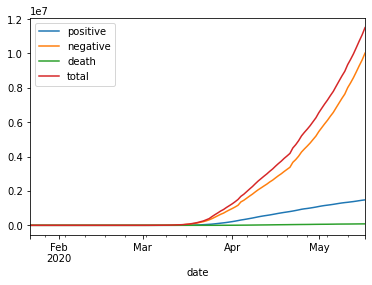

In [14]:
x=gbUSA.sum().loc[:, ['positive', 'negative','death','total']].plot.line()

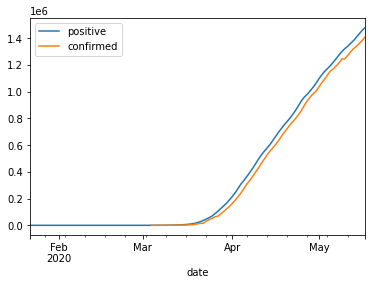

In [15]:
dfResults = gbUSA.sum().join(dfWHO, how='left', rsuffix='_who' )
dfResults.loc[:, ['positive', 'confirmed']].plot.line()

# John Hopkins Data


In [16]:
dfJHUData[dfJHUData.country=='US'][['confirmed', 'dead']].sum()

confirmed    1467820
dead           88754
dtype: int64

In [17]:
dfJHUData[(dfJHUData.country=='US')&(dfJHUData.state=='California')][['confirmed', 'dead']].sum()

confirmed    78725
dead          3208
dtype: int64

In [0]:
dfJHUUS = dfJHUData[dfJHUData.country=='US']
gbJHUByState= dfJHUUS.groupby(by='state')
gbJHUByCountry = dfJHUData.groupby(by='country')

In [19]:
gbJHUByCountry.confirmed.sum().sort_values(ascending=False).head(10)

country
US                1467820
Russia             272043
United Kingdom     241461
Brazil             233511
Spain              230698
Italy              224760
France             179630
Germany            175752
Turkey             148067
Iran               118392
Name: confirmed, dtype: int64

In [20]:
dfctd_state_curr.head()

,date,total_positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
state,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,2020-05-17,396,34255,0,13.0,0.0,0.0,0.0,0.0,0.0,344.0,B,5/17/2020 00:00,65ce5b20ebcfe9a6260ba1d15a840072474f3924,2020-05-17T20:00:00Z,10,0.0,34651,34651,34651,02,0.0,0.0,1366.0,4.0,1370.0
AL,2020-05-17,11771,144579,0,0.0,1392.0,0.0,504.0,0.0,296.0,0.0,B,5/16/2020 00:00,540fc4ecea85eb597ddf161ce4bc54e4e9b780a6,2020-05-17T20:00:00Z,488,1392.0,156350,156350,156350,01,3.0,5.0,2608.0,248.0,2856.0
AR,2020-05-17,4759,80426,0,65.0,520.0,0.0,0.0,9.0,101.0,3590.0,A,5/17/2020 00:00,28092115d4cbcaa02ed0184e52163f38412774e3,2020-05-17T20:00:00Z,98,520.0,85185,85185,85185,05,0.0,0.0,3360.0,181.0,3541.0
AS,2020-05-17,0,105,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,C,5/10/2020 00:00,25ede1d0f7b90a1989a45a025463b8d1a63f3ce3,2020-05-17T20:00:00Z,0,0.0,105,105,105,60,0.0,0.0,0.0,0.0,0.0
AZ,2020-05-17,13937,137824,0,796.0,1699.0,337.0,0.0,201.0,0.0,3450.0,A+,5/17/2020 00:00,cb43c97c57f170e9df1177fb0c9a53c6ba6a9fe6,2020-05-17T20:00:00Z,680,1699.0,151761,151761,151761,04,1.0,16.0,4667.0,306.0,4973.0


In [0]:
dfState = dfCovidtracking[['date','state','positive', 'death']].set_index('state') \
  .join(dfctd_state_curr.total_positive)

In [0]:
dfState['pct']=dfState.positive/dfState.total_positive

In [23]:
dfState.loc['FL'].head(7)

,date,positive,death,total_positive,pct
state,,,,,
FL,2020-05-17,45588,2049,45588,1.000000
FL,2020-05-16,44811,2040,45588,0.982956
FL,2020-05-15,43210,1991,45588,0.947837
FL,2020-05-14,43210,1948,45588,0.947837
FL,2020-05-13,42402,1898,45588,0.930113
FL,2020-05-12,41923,1849,45588,0.919606
FL,2020-05-11,40982,1805,45588,0.898965


In [0]:
res = dfState.reset_index().pivot(index = 'date', columns='state', values='pct').fillna(0)

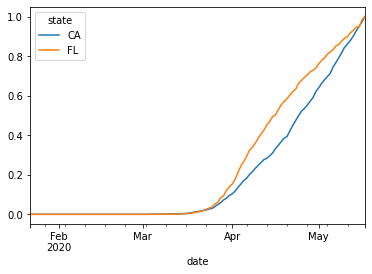

In [25]:
x = res.loc[:, ['CA','FL']].plot.line()

In [0]:
dfNYTesting = dfCovidtracking.loc[dfCovidtracking.state=='NY', ['date', 'negative']].set_index('date')

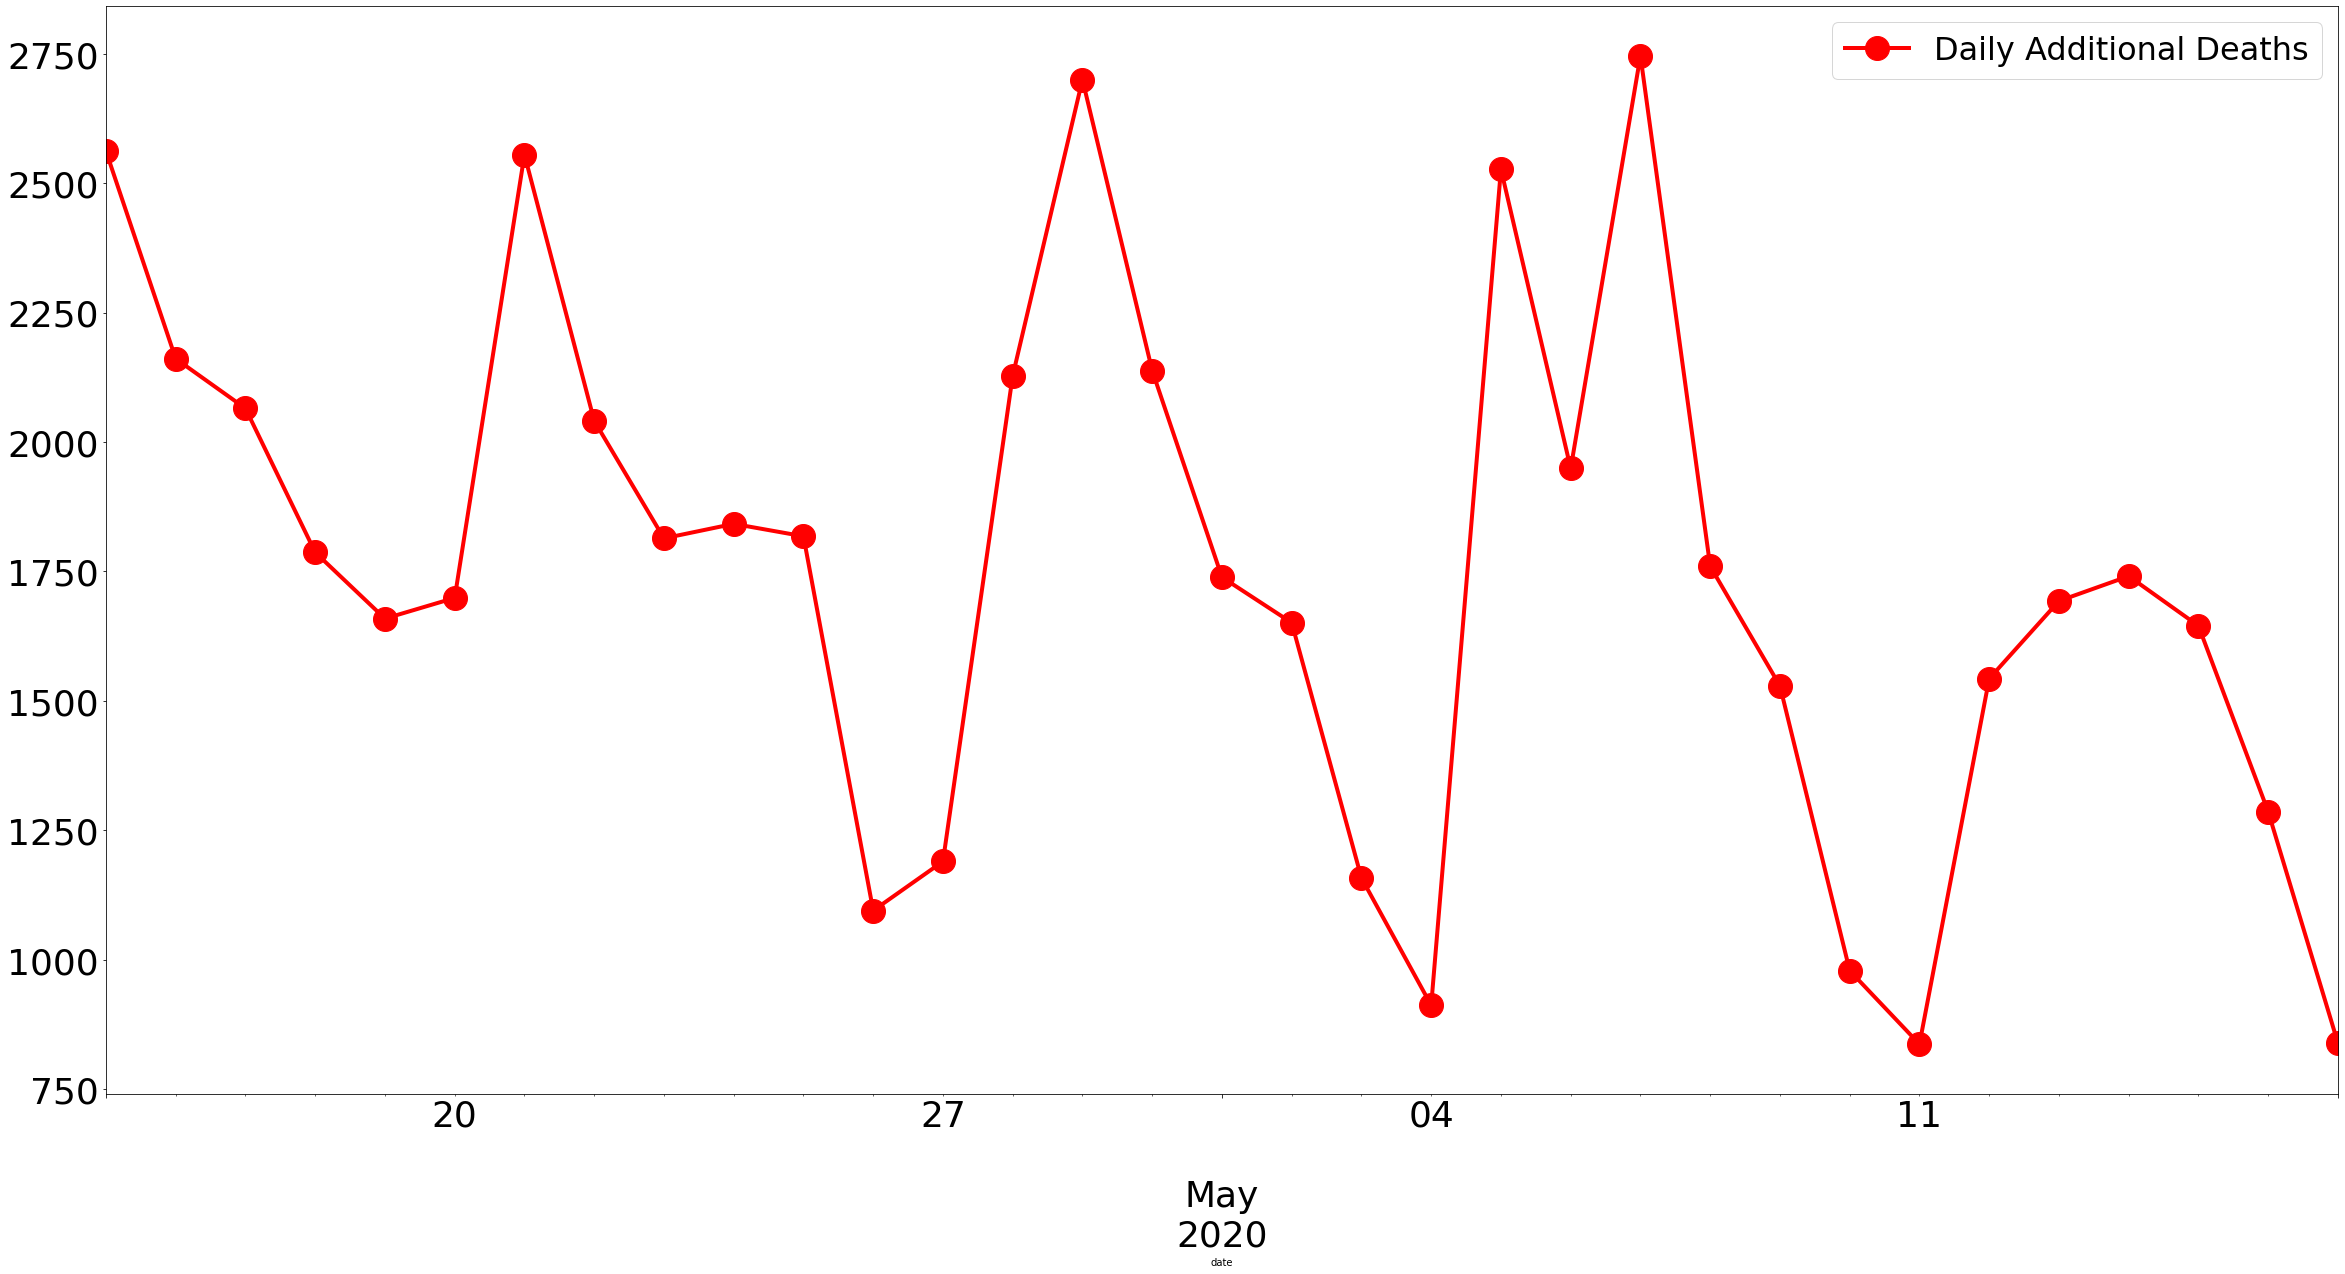

In [27]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:].deathIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Deaths'],fontsize=32)


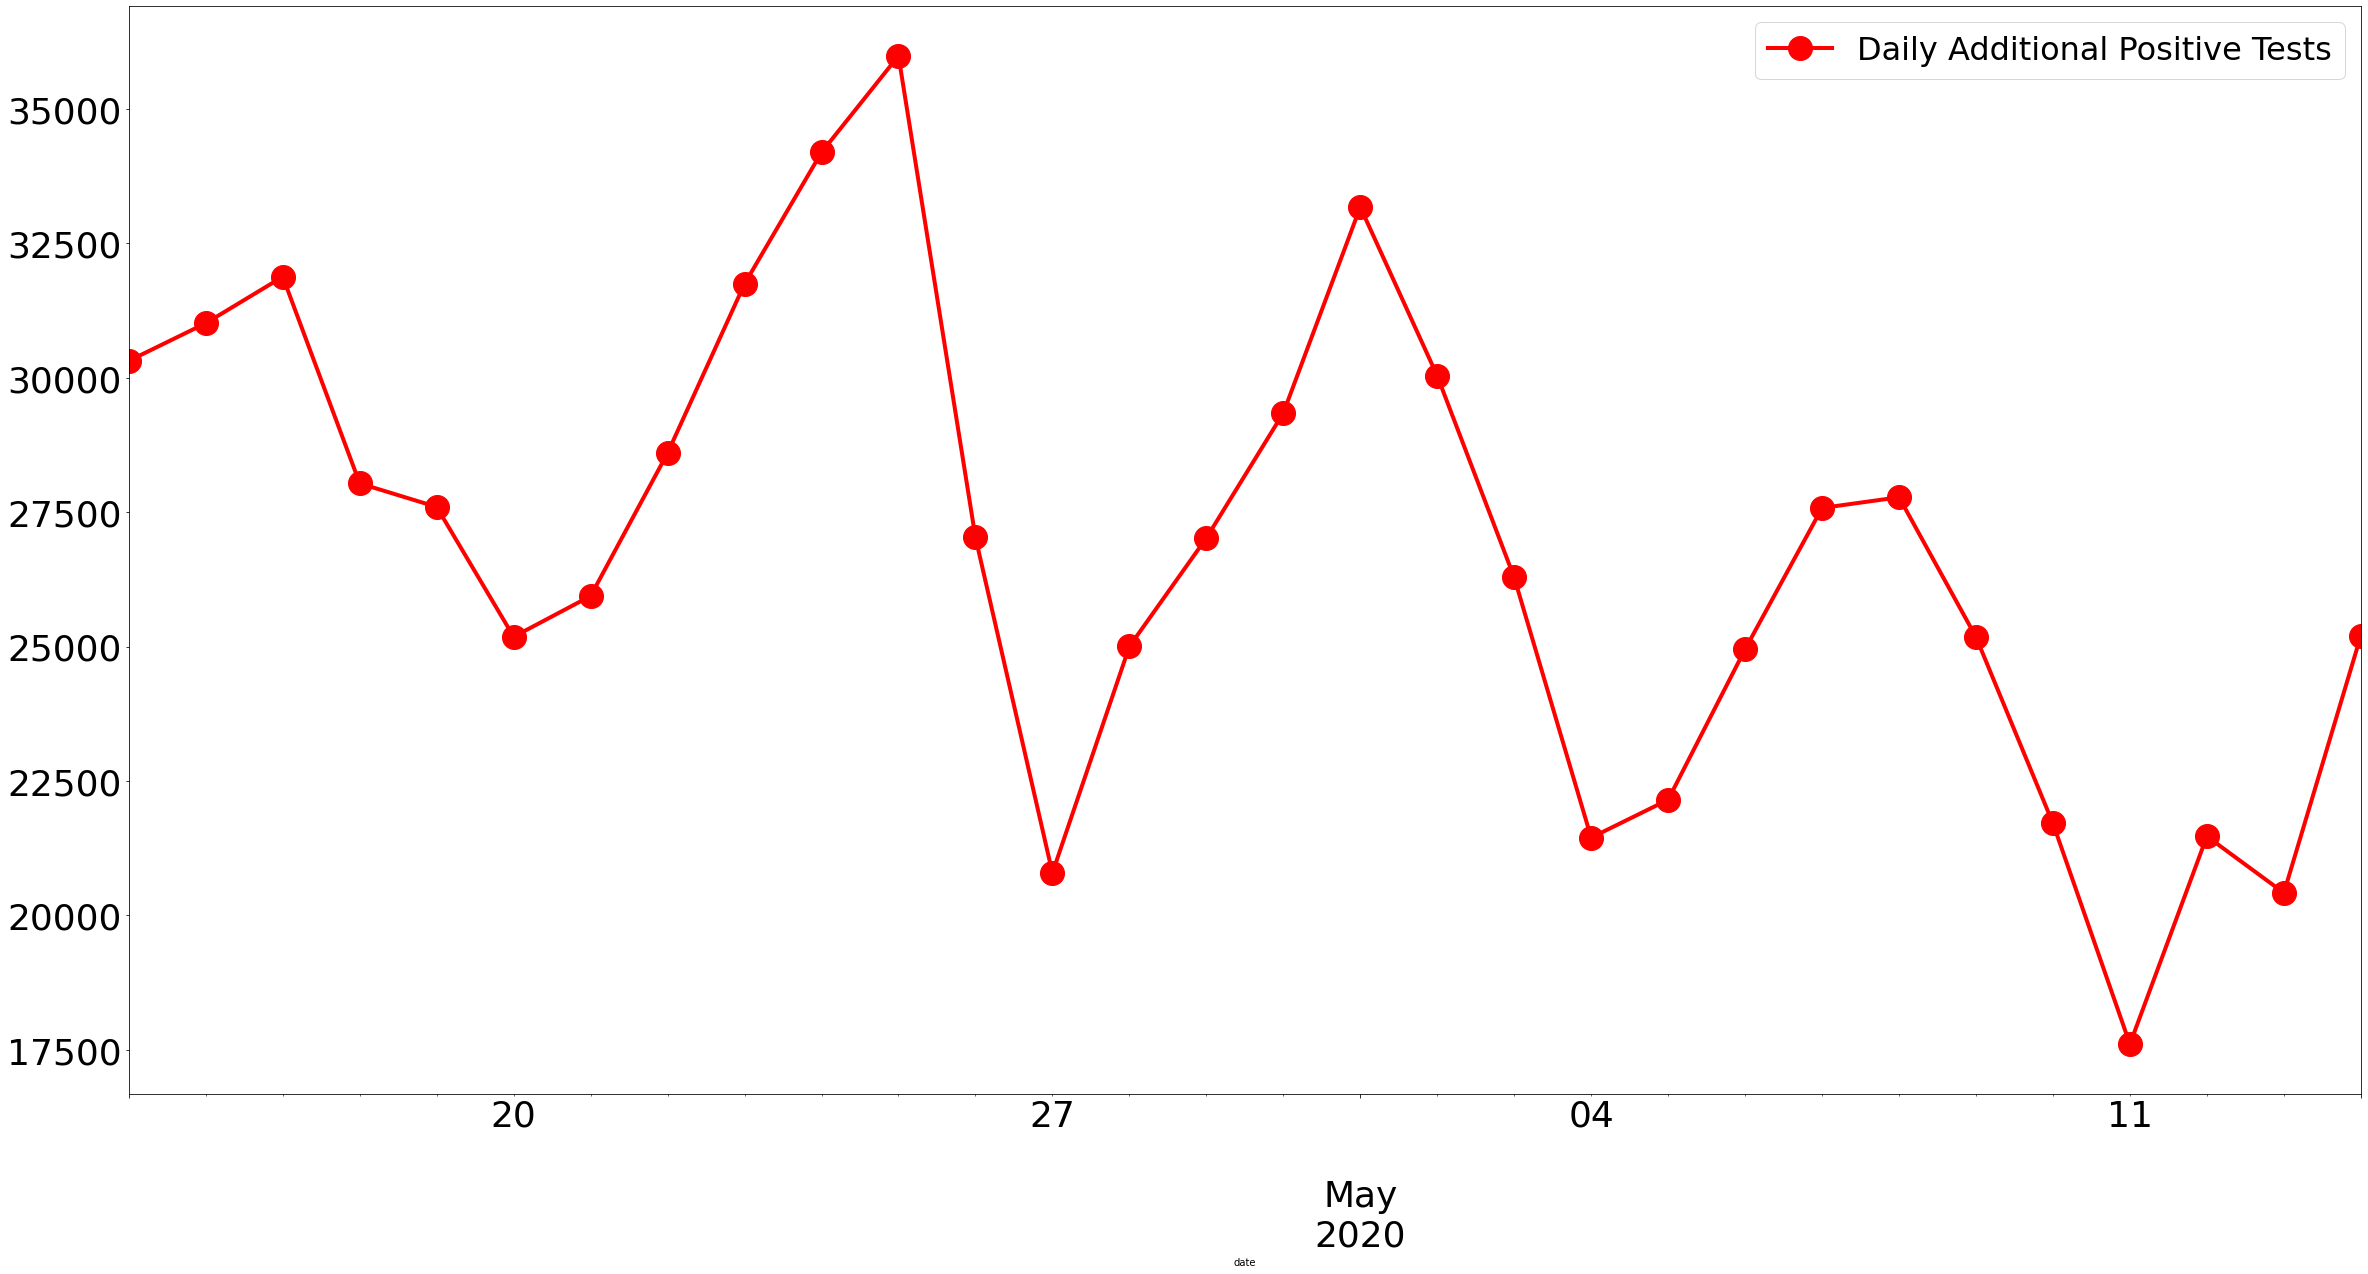

In [28]:
x = dfCovidtracking.groupby(by='date')
y1=x.sum()[-33:-3].positiveIncrease.plot.line(figsize=(40,20), fontsize=36, \
  style='.-', markersize=48, color='red', linewidth=4) \
.legend(['Daily Additional Positive Tests'],fontsize=32)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfByWeekYear = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=getWeek)


In [0]:
def getWeek(dt):
  return (dt.year*100)+dt.week

dfDoW = dfCovidtracking.set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']].groupby(by=lambda x: x.dayofweek)


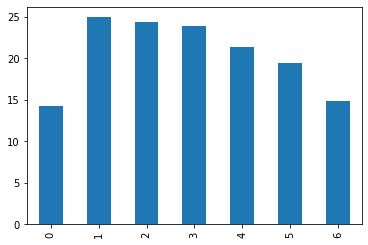

In [31]:
dfDoW.mean().deathIncrease.plot.bar()



In [32]:
dfByWeekYear.sum()[-7:]

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
202014,7187.0,24475.0,744416.0,190421.0,934837.0
202015,12523.0,22930.0,834613.0,217188.0,1051801.0
202016,14063.0,21844.0,843524.0,199740.0,1043264.0
202017,12864.0,18239.0,1309854.0,208697.0,1518551.0
202018,12704.0,24854.0,1457566.0,191663.0,1649229.0
202019,12402.0,18984.0,1745308.0,170801.0,1906796.0
202020,9584.0,12125.0,2381992.0,157049.0,2539041.0


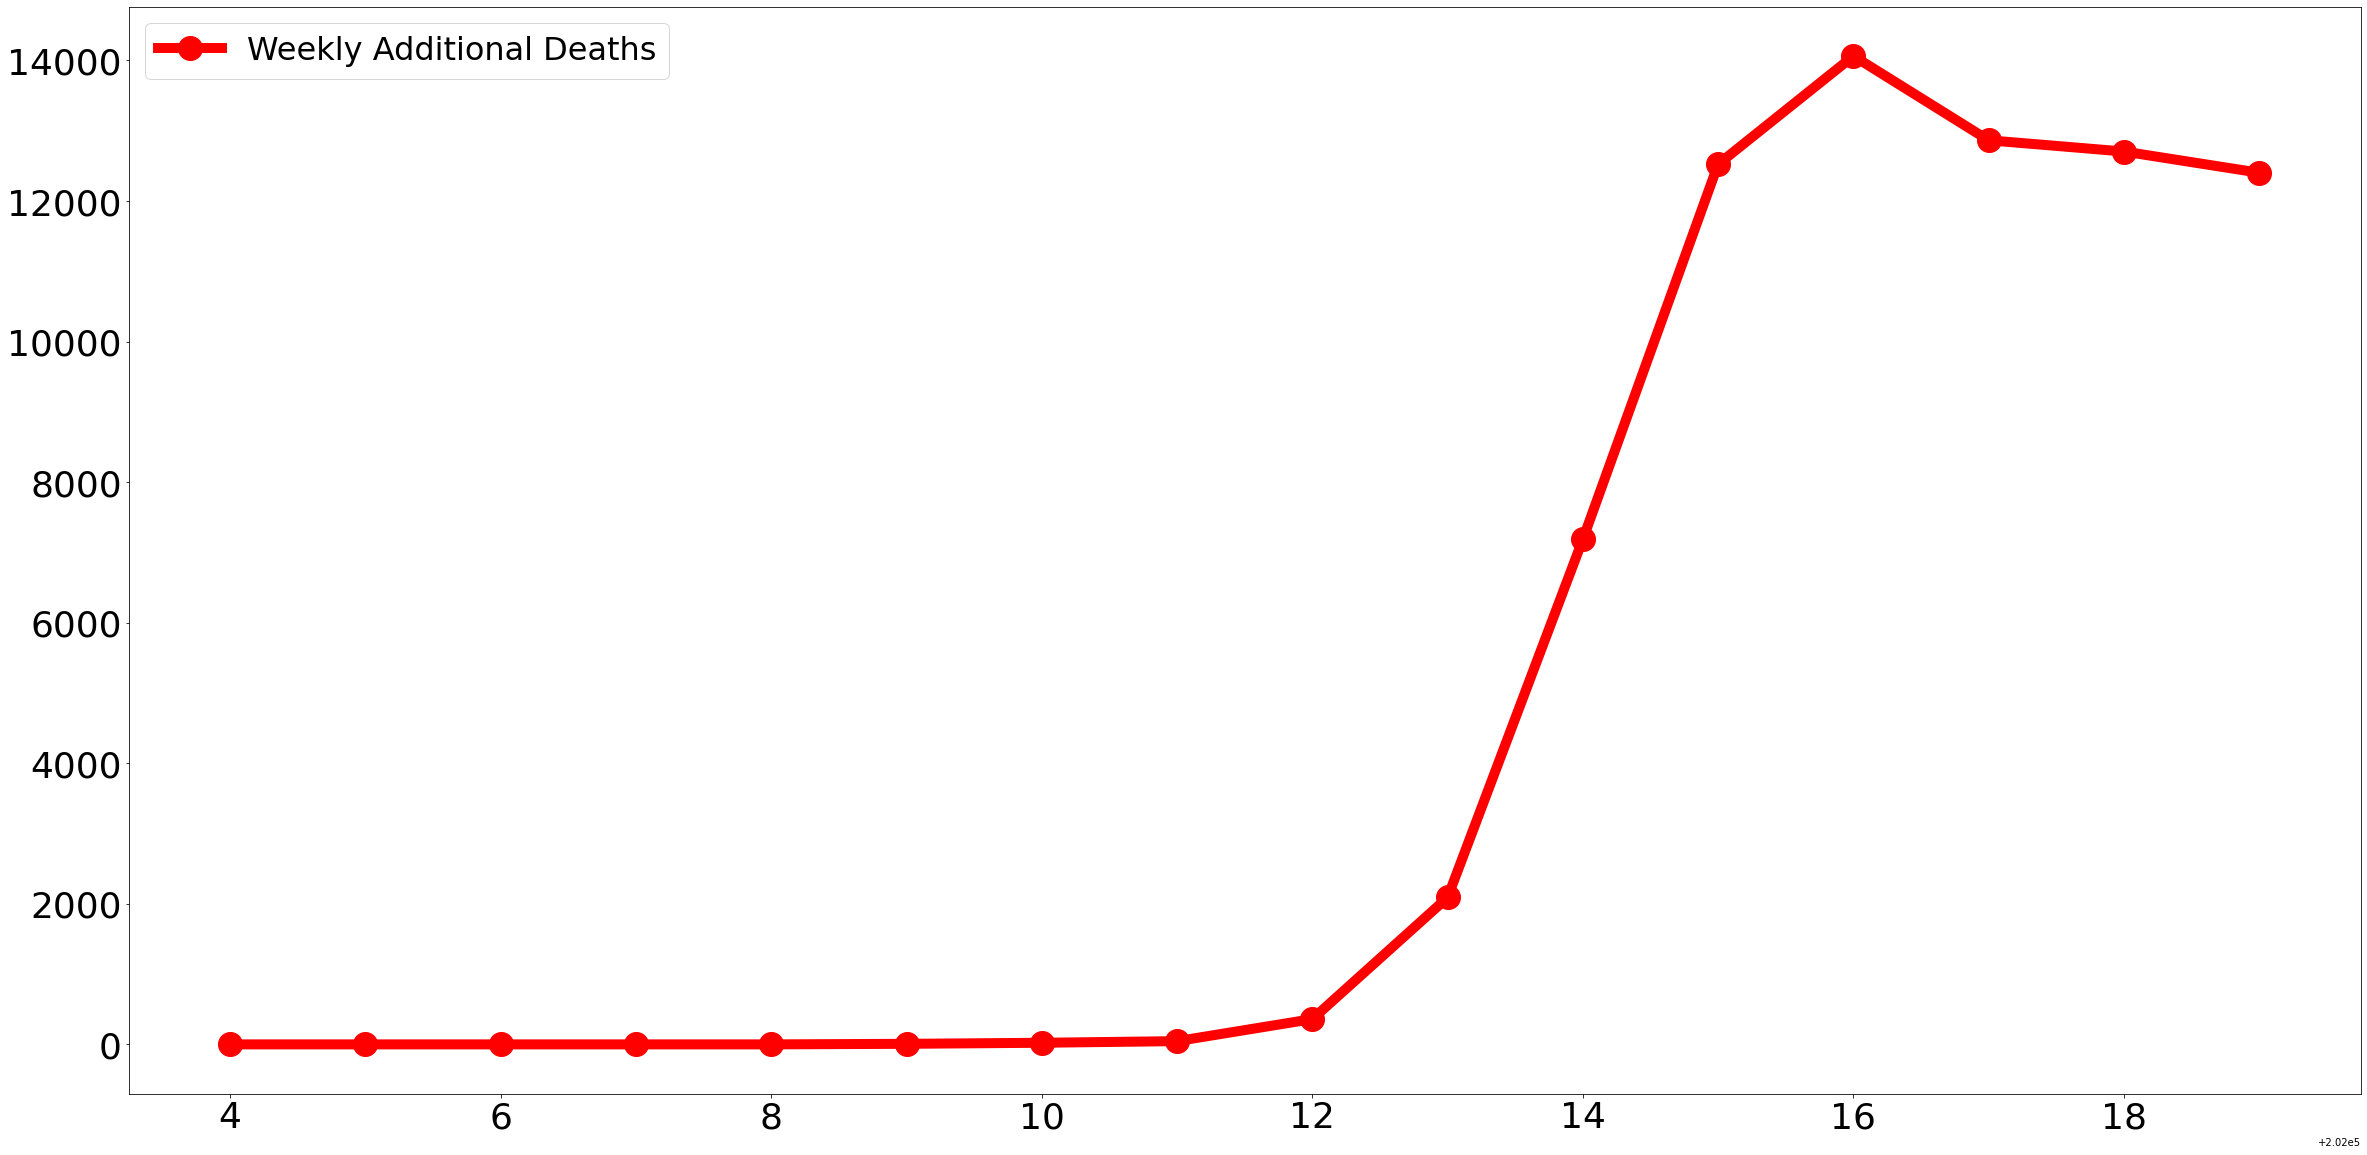

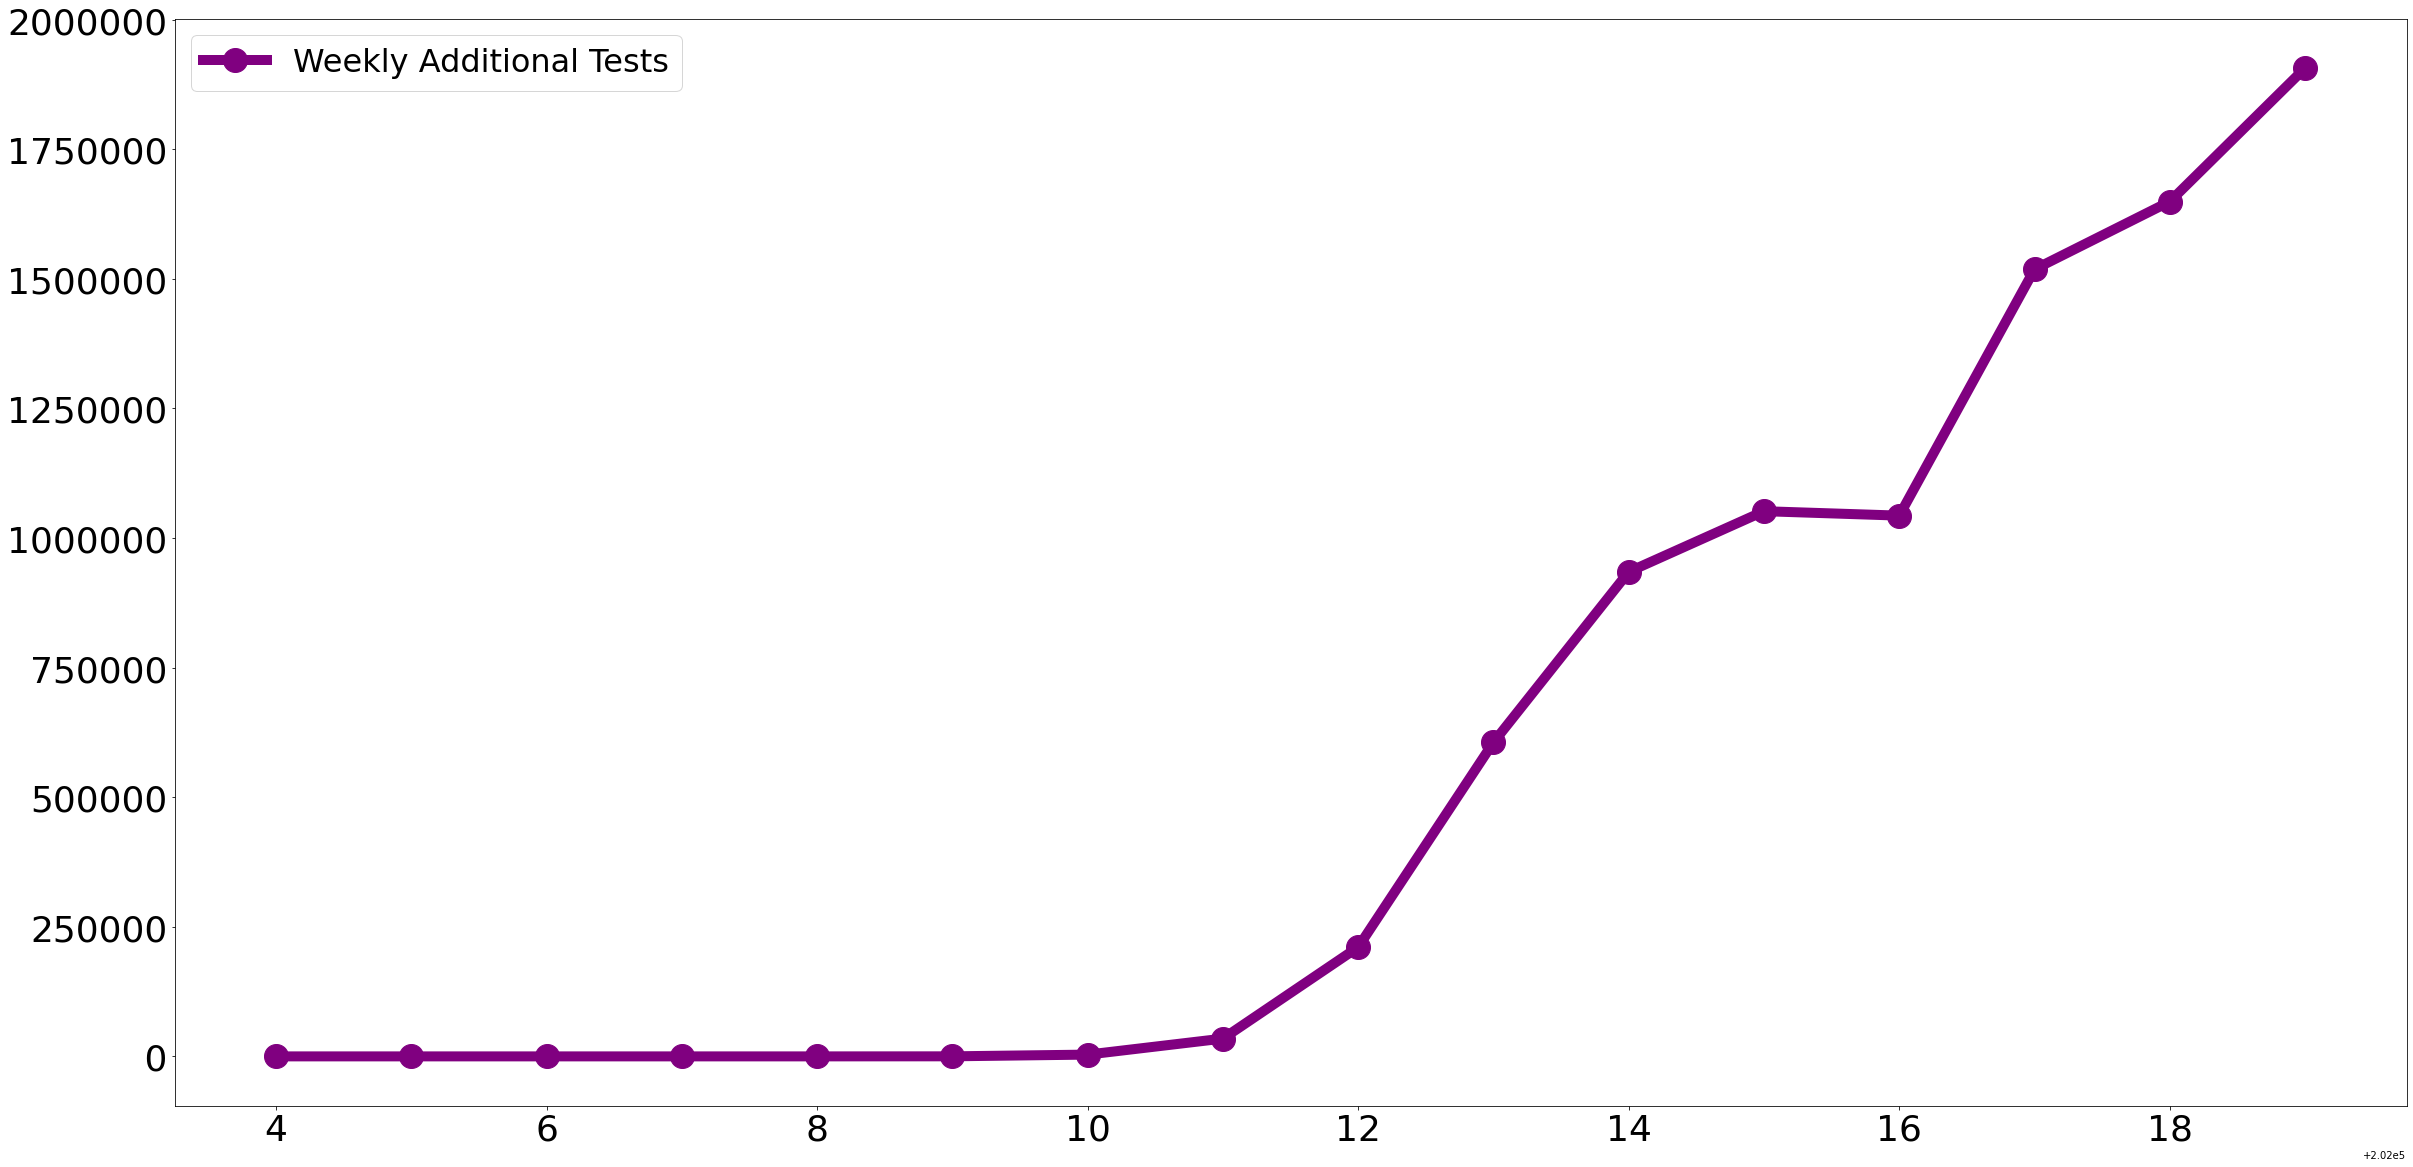

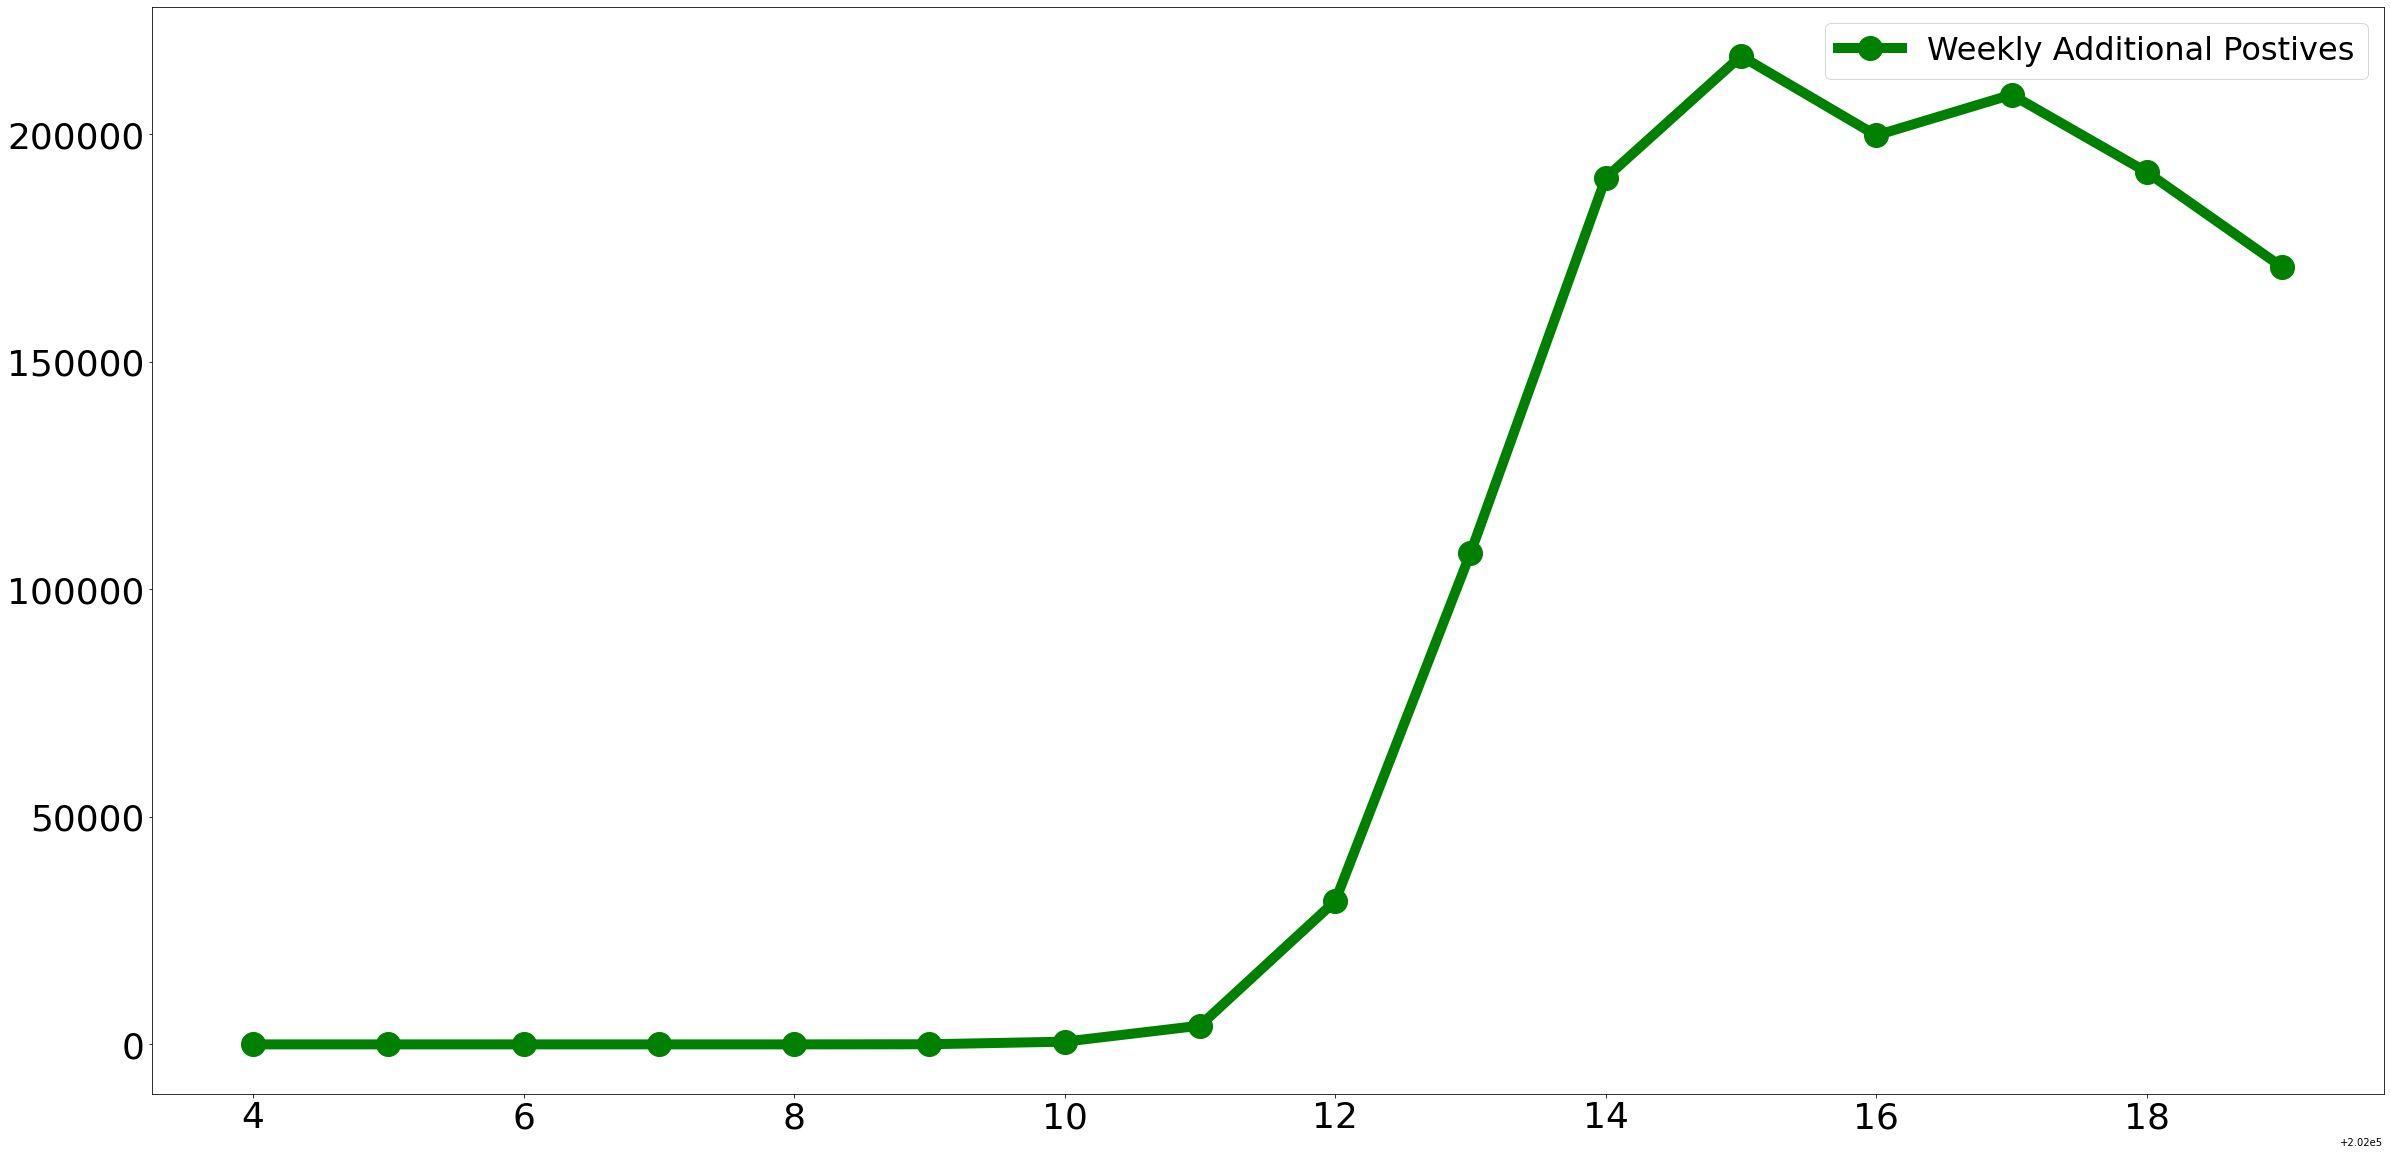

In [33]:
import matplotlib.ticker as ticker
plt1 = dfByWeekYear.sum()[:-1][['deathIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='red')
plt1.legend(['Weekly Additional Deaths'],fontsize=32)
plt2 = dfByWeekYear.sum()[:-1][['totalTestResultsIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='purple')
plt2.legend(['Weekly Additional Tests'],fontsize=32)

plt2.yaxis.set_major_formatter(ticker.FormatStrFormatter('%6.0d'))
    
plt3 = dfByWeekYear.sum()[:-1][['positiveIncrease']].plot.line(figsize=(40,20), \
    fontsize=36, style='.-', markersize=48, linewidth=10, color='green')
plt3.legend(['Weekly Additional Postives'],fontsize=32)

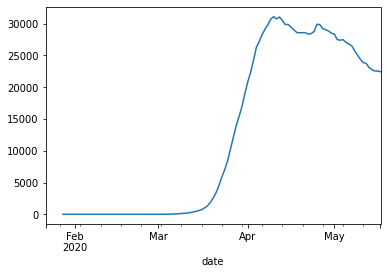

In [34]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().positiveIncrease.plot.line()

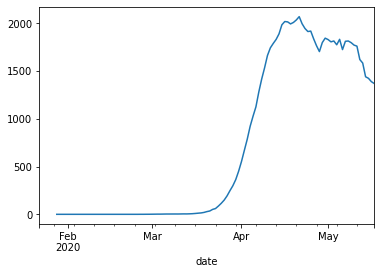

In [35]:
dfCovidtracking.groupby(by='date').sum().rolling(window=7).mean().deathIncrease.plot.line()

In [0]:
dfCAAvg = dfCovidtracking[dfCovidtracking.state=='CA'] \
.groupby(by='date').sum().rolling(window=7).mean()

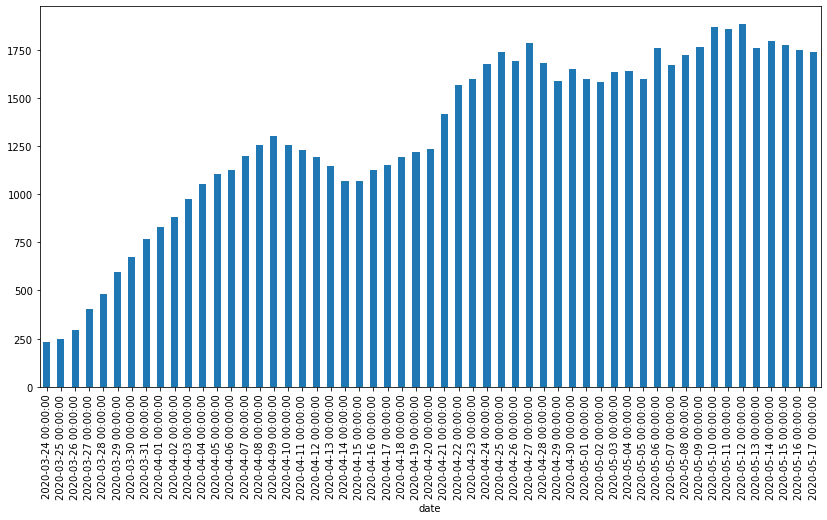

In [37]:

graph1 = dfCAAvg[20:].positiveIncrease.plot.bar(figsize=(14,7))


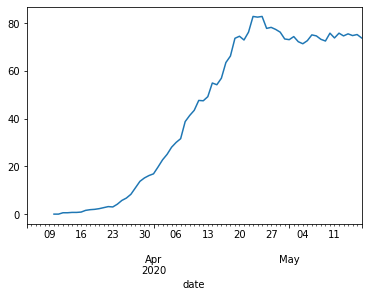

In [38]:
dfCAAvg.deathIncrease.plot.line()

In [39]:
dfDates = dfState.reset_index().copy()
dfDates[(dfDates.state.isin(['FL']))].head(10)

,state,date,positive,death,total_positive,pct
724,FL,2020-05-17,45588,2049,45588,1.000000
725,FL,2020-05-16,44811,2040,45588,0.982956
726,FL,2020-05-15,43210,1991,45588,0.947837
727,FL,2020-05-14,43210,1948,45588,0.947837
728,FL,2020-05-13,42402,1898,45588,0.930113
729,FL,2020-05-12,41923,1849,45588,0.919606
730,FL,2020-05-11,40982,1805,45588,0.898965
731,FL,2020-05-10,40596,1791,45588,0.890497
732,FL,2020-05-09,40001,1785,45588,0.877446
733,FL,2020-05-08,39199,1738,45588,0.859853


In [40]:
datecutoff = dfDates.date.max()-datetime.timedelta(days=7)
dfDates[(dfDates.date == datecutoff) & (dfDates.pct < .75)].sort_values(by='pct')


,state,date,positive,death,total_positive,pct
1818,MN,2020-05-10,11271,578,15668,0.719364


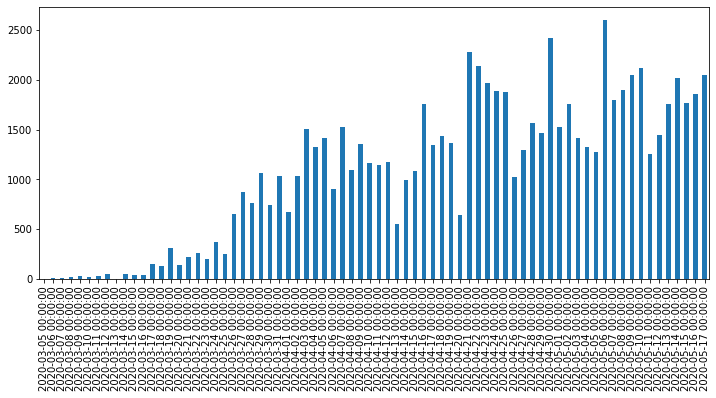

In [41]:
state = 'CA'
dfState = dfCovidtracking[dfCovidtracking.state==state].sort_values(by='date')
vals = dfState.positive.values

x=pd.Series([y-x for x,y in zip(vals,vals[1:])], \
          index = dfCovidtracking[dfCovidtracking.state==state]\
          .sort_values(by='date').date.values[1:] ) \
          .plot.bar(figsize=(12,5))



# State Population Data


In [0]:
data_url = "https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/national/totals/nst-est2019-alldata.csv"


In [0]:
dfUSPop = pd.read_csv(data_url)

In [44]:
import math
us_pop = dfUSPop.loc[0].POPESTIMATE2019 #Estimate from Wikipedia
res = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max(), ['positive', 'negative', 'pending','death', 'total']].sum()
cir = res.positive/res.total
cfr = res.death/res.positive
p_aff= math.ceil(us_pop*cir)
p_dead= math.ceil(p_aff*cfr)
print(res)
print(f"Current Infection Rate {cir*100:2f}%")
print(f"Percentage of US affected: {(res.positive+res.death)/us_pop*100:2f}%")
print(f"Observed CFR: {cfr*100:2f}%")
print(f"Percentage of US tested/affected: {(res.negative+res.positive+res.death)/us_pop*100:2f}%")
print(f"Projected affected by cir = {p_aff:,d}")
print(f"Projected killed = {p_dead:,d}")


positive     1479856
negative    10019347
pending         3449
death          83854
total       11502652
dtype: int64
Current Infection Rate 12.865346%
Percentage of US affected: 0.476393%
Observed CFR: 5.666362%
Percentage of US tested/affected: 3.528843%
Projected affected by cir = 42,229,151
Projected killed = 2,392,857


In [0]:
!if [ ! -d "loc" ]; then \
git clone https://gist.github.com/rogerallen/1583593 --depth=1 --quiet loc; \
fi
import sys
sys.path.append("loc")




In [0]:
import us_state_abbrev as us_abbr


In [0]:
dfStatePop = dfUSPop[dfUSPop.STATE != 0].copy()

In [0]:
dfStatePop['ABBR']=dfStatePop.NAME.apply(lambda x: us_abbr.us_state_abbrev[x])

In [0]:
dfStatePop = dfStatePop.loc[:, ['ABBR', 'POPESTIMATE2019']]
dfStatePop.set_index('ABBR', inplace=True)

In [0]:
dfStateCovid = dfCovidtracking.loc[dfCovidtracking.date==dfCovidtracking.date.max()].set_index('state')

In [0]:
dfStateJoin = dfStateCovid.join(dfStatePop)

In [52]:
pd.DataFrame([(dfStateJoin.positive / dfStateJoin.POPESTIMATE2019)*100, \
              (dfStateJoin.totalTestResults/ dfStateJoin.POPESTIMATE2019)*100],\
             index=['state_pos_pop','state_test_pop'] ).T.sort_values(by="state_pos_pop", ascending=False)[:51]

,state_pos_pop,state_test_pop
state,,
NY,1.799778,7.265487
NJ,1.647499,5.489243
MA,1.247878,6.685902
RI,1.196382,10.624329
CT,1.049537,4.785225
DC,1.009282,5.175494
DE,0.787665,4.196602
IL,0.743311,4.592426
LA,0.740665,5.704060


In [53]:
#print(f"Current Infection Rate {res.positive/res.total*100:2f}%")

print(f"Current Testing Percent {gbUSA.sum().tail(1).totalTestResults[0]/dfUSPop[dfUSPop.REGION=='0'].POPESTIMATE2019[0]*100:2f}%")

Current Testing Percent 3.503296%


In [54]:
dfJHUData.columns

Index(['FIPS', 'city', 'state', 'country', 'last_update', 'lat', 'lon',
       'confirmed', 'dead', 'recovered', 'active', 'key'],
      dtype='object')

In [0]:
dfOwid = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [56]:
dfOwid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17845 entries, 0 to 17844
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   iso_code                  17781 non-null  object 
 1   location                  17845 non-null  object 
 2   date                      17845 non-null  object 
 3   total_cases               17845 non-null  int64  
 4   new_cases                 17845 non-null  int64  
 5   total_deaths              17845 non-null  int64  
 6   new_deaths                17845 non-null  int64  
 7   total_cases_per_million   17533 non-null  float64
 8   new_cases_per_million     17533 non-null  float64
 9   total_deaths_per_million  17533 non-null  float64
 10  new_deaths_per_million    17533 non-null  float64
 11  total_tests               4586 non-null   float64
 12  new_tests                 4080 non-null   float64
 13  total_tests_per_thousand  4586 non-null   float64
 14  new_te

In [0]:
dfOwidTests = dfOwid.dropna(subset=['total_tests']).copy()

In [0]:
dfOwidLatest = dfOwidTests.sort_values(by='date').groupby('iso_code').last()

In [59]:
dfOwidLatest.total_tests.sort_values(ascending=False)

iso_code
USA    10720185.0
RUS     6656340.0
DEU     3147771.0
ITA     2944859.0
IND     2134277.0
          ...    
PRY       14646.0
CRI       13696.0
MMR       13634.0
ZWE       11401.0
BOL        9663.0
Name: total_tests, Length: 84, dtype: float64

In [60]:
isUSA = dfOwidLatest.index.isin(['USA'])
NonUSTests = dfOwidLatest[~isUSA].total_tests.sum()
USTests = dfOwidLatest[isUSA].total_tests.sum()

print(f"Total testing done outside of USA: {NonUSTests:.0f}")
print(f"Total tests done in USA : {USTests:.0f}")
print(f"How many more times has the world tested more than the US: {NonUSTests/USTests:.1f}")

Total testing done outside of USA: 38416056
Total tests done in USA : 10720185
How many more times has the world tested more than the US: 3.6


In [61]:
dfOwidLatest[isUSA].sum()

location                                                  United States
date                                                         2020-05-16
total_cases                                                     1443397
new_cases                                                         25508
total_deaths                                                      87568
new_deaths                                                         1662
total_cases_per_million                                         4360.68
new_cases_per_million                                            77.063
total_deaths_per_million                                        264.554
new_deaths_per_million                                            5.021
total_tests                                                 1.07202e+07
new_tests                                                        378410
total_tests_per_thousand                                         32.387
new_tests_per_thousand                                          

In [62]:
dfOwidUSA = dfOwid.loc[dfOwid.iso_code=='USA']

dfOwidUSA.set_index('date')[['new_cases','new_deaths']][-7:]

,new_cases,new_deaths
date,,
2020-05-11,20258,734
2020-05-12,18117,1156
2020-05-13,22048,1703
2020-05-14,20782,1746
2020-05-15,27143,1773
2020-05-16,25508,1662
2020-05-17,24487,1186


In [0]:
state = 'MN'
dfRollingWeekState = dfCovidtracking.loc[dfCovidtracking.state==state].set_index('date')\
.rolling(window=7).sum()


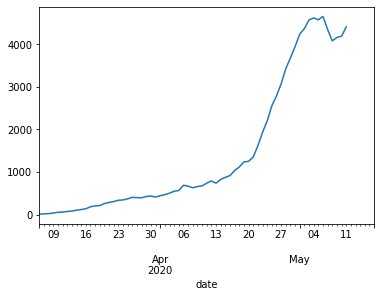

In [64]:
plt = dfRollingWeekState.positiveIncrease.plot.line()

In [65]:
dfJHUData[dfJHUData.state=='Florida'].confirmed.sum()

44811

In [0]:
doWGA = dfCovidtracking[dfCovidtracking.state=='GA'].set_index('date')[['deathIncrease', 'hospitalizedIncrease', 'negativeIncrease','positiveIncrease','totalTestResultsIncrease']]\
.groupby(lambda x: x.dayofweek)

In [67]:
doWGA.sum()

,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,244.0,733.0,27260.0,4297.0,31557.0
1,375.0,1333.0,49724.0,6503.0,56227.0
2,291.0,1567.0,32075.0,6331.0,38406.0
3,203.0,901.0,44037.0,5058.0,49095.0
4,266.0,1061.0,57529.0,6785.0,64314.0
5,148.0,928.0,51800.0,4436.0,56236.0
6,79.0,267.0,51049.0,4289.0,55338.0


In [68]:
!pip install sodapy

In [0]:
from sodapy import Socrata

In [0]:
client = Socrata("data.sfgov.org", "LCSuN5PrqWkGtBe9dULkS75Rz")

In [0]:
results = client.get("tvq9-ec9w")


In [0]:

results_df = pd.DataFrame.from_records(results)

In [0]:
res = results_df.astype({'case_count':'int16'})

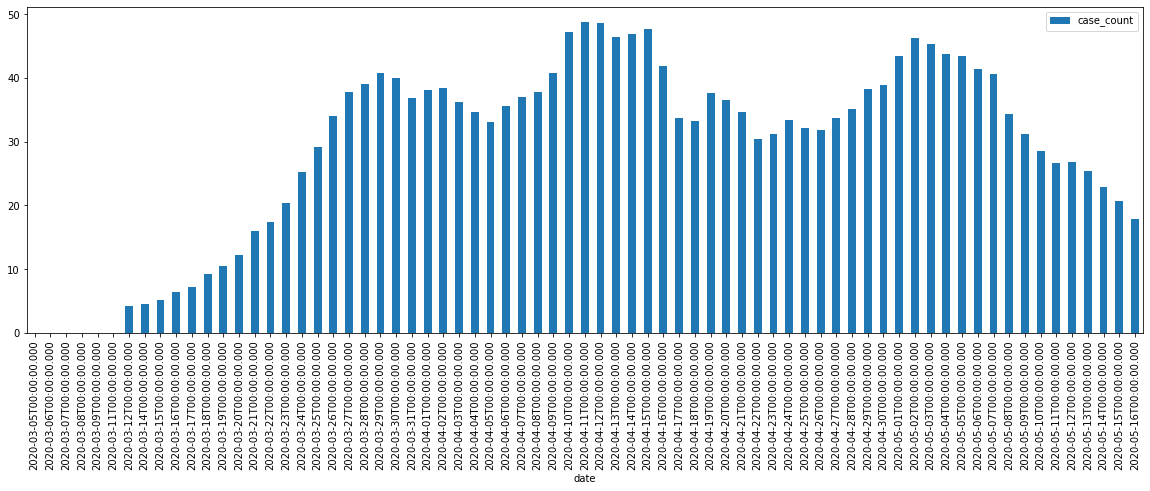

In [74]:
res.groupby('date').sum().rolling(window=7).mean().plot.bar(figsize=(20,6))